# Smile On 60+ EDA

### Import modules

In [17]:
import pandas as pd
import dtale
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read in CLEAN .csv

In [2]:
smileon_df = pd.read_csv('../data/Smileon.2021.10.17.CLEAN.csv')

### Check DataFrame
- Exporting to .csv does not keep custom datatypes

In [3]:
# Set it to None to display all columns in the dataframe
#pd.set_option('display.max_columns', None)
smileon_df.info()
#smileon_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57791 entries, 0 to 57790
Columns: 120 entries, ReportID to Eligibility Verification
dtypes: float64(48), int64(5), object(67)
memory usage: 52.9+ MB


### Convert column datatypes

In [4]:
# Convert columns to category
smileon_df[[
    'City',
    'County',
    'Reviewed', 
    'ReferralsMade',
    'Are you limited in what you can eat?',
    'How would you describe the condition of your mouth and teeth?',
    'What is the outcome for the client?',
    'Gender', 
    'Household Income', 
    'Race/Ethnicity', 
    'When is the last time you visited your dentist?',
    'Is the treatment plan completed?',
    'Was enrollee restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)'
]] = smileon_df[[
    'City',
    'County',
    'Reviewed',
    'ReferralsMade',
    'Are you limited in what you can eat?',
    'How would you describe the condition of your mouth and teeth?',
    'What is the outcome for the client?',
    'Gender', 
    'Household Income',
    'Race/Ethnicity',
    'When is the last time you visited your dentist?',
    'Is the treatment plan completed?',
    'Was enrollee restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)'
]].apply(pd.Categorical)

#### Prepare columns to be converted to datetime
- Check for null values and figure out what to do with them
- CallStart, CallEnd, Last Screening, and Eligibility Verification Date columns

In [5]:
#smileon_df['Last Screening'].isnull().sum()

In [6]:
# Convert columns to datetime
smileon_df['Last Screening'] = pd.to_datetime(
    smileon_df['Last Screening'], 
    errors = 'coerce'
).dt.strftime('%m/%d/%Y')

smileon_df['Eligibility Verification Date'] = pd.to_datetime(
    smileon_df['Eligibility Verification Date'], 
    errors = 'coerce'
).dt.strftime('%m/%d/%Y')

smileon_df[[
    'CallStart', 
    'CallEnd', 
    'Last Screening', 
    'Eligibility Verification Date'
]] = smileon_df[[
    'CallStart', 
    'CallEnd', 
    'Last Screening', 
    'Eligibility Verification Date'
]].apply(pd.to_datetime)

### Exploring smileon_df with dtale

In [7]:
#d = dtale.show(smileon_df)
# Open it in a new window in browser
#d.open_browser()

### Create DataFrame with PatientID and Birth Year

In [14]:
#smileon_df.head()
patient_age_df = smileon_df[[
    'PatientID', 
    'Birth Year'
]].copy()

patient_age_df['PatientID'].nunique()
#patient_age_df.head()

10603

### Clean Birth Year & PatientID columns for Age analysis

In [10]:
# Grab index names for .drop() method
indexNames = patient_age_df[
    (smileon_df['Birth Year'] == '2298') | 
    (smileon_df['Birth Year'] == '5245') |
    (smileon_df['Birth Year'] == '#VALUE!') |
    (smileon_df['Birth Year'] == '#NUM!') |
    (smileon_df['Birth Year'] == '1900') |
    (smileon_df['Birth Year'] == '2018') |
    (smileon_df['Birth Year'] == '2019') |
    (smileon_df['Birth Year'] == '2020') |
    (smileon_df['Birth Year'] == '2021') |
    (smileon_df['Birth Year'] == 1900) |
    (smileon_df['Birth Year'] == 2018) |
    (smileon_df['Birth Year'] == 2019) |
    (smileon_df['Birth Year'] == 2020) |
    (smileon_df['Birth Year'] == 2021) |
    (smileon_df['Birth Year'] == 2041) |
    (smileon_df['Birth Year'] == 2354)
].index

# Drop invalid Birth Years
patient_age_df.drop(indexNames, inplace=True)

# Drop duplicate PatientIDs
patient_age_df.drop_duplicates(subset = ['PatientID'], inplace = True)

### Calculate age of patients and add to new column

In [11]:
patient_age_df['Birth Year'] = patient_age_df['Birth Year'].astype('int')
assert patient_age_df['Birth Year'].dtypes == 'int32'
patient_age_df['Age'] = 2021 - patient_age_df['Birth Year']
#patient_age_df['Age'].dtypes
#patient_age_df['Age']

### Convert PatientID to object and drop Birth Year column

In [12]:
patient_age_df['PatientID'] = patient_age_df['PatientID'].astype('object')
assert patient_age_df['PatientID'].dtypes == 'object'
patient_age_df.drop(columns = ['Birth Year'], inplace = True)
#patient_age_df.describe()

### Explorting patient_age_df with dtale

In [13]:
d = dtale.show(patient_age_df)
# Open it in a new window in browser
d.open_browser()

### Visualize Age data

<AxesSubplot:xlabel='Age', ylabel='Count'>

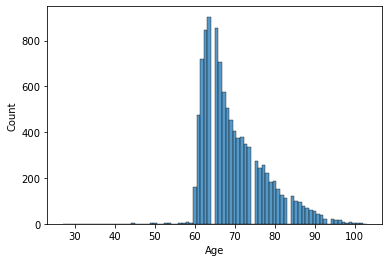

In [19]:
sns.histplot(
    patient_age_df['Age']
)